In [61]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1.  Grab an image with alpha, and background of your choosing and composite them.. 

In [62]:
import skimage.io

In [122]:
alpha_base = skimage.io.imread('https://bellard.org/bpg/2.png')
rgb = skimage.io.imread(r'https://huiji-thumb.huijistatic.com/warframe/uploads/thumb/5/5b/BallasPrologue.jpg/250px-BallasPrologue.jpg')
bkg = skimage.io.imread('https://thenerderygaming.files.wordpress.com/2015/12/warframe_cover_art.png')

In [123]:
alpha = skimage.img_as_float(alpha_base)
rgb = skimage.img_as_float(rgb)
bkg = skimage.img_as_float(bkg)

In [124]:
import skimage.transform
bkg = skimage.transform.resize(bkg, alpha.shape, mode='reflect', anti_aliasing=True)

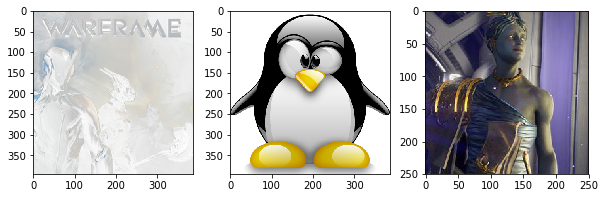

In [125]:
gray();
figsize(10,3)
subplot(1,3,1)
imshow(bkg)

subplot(1,3,2)
imshow(alpha)
#colorbar();

subplot(1,3,3)
imshow(rgb)

In [127]:
print(numpy.shape(alpha))
alpha_merged = alpha[:,:None]
numpy.shape(alpha_merged)

(395, 386, 4)


(395, 386, 4)

In [129]:
comp = (1-alpha_merged)*bkg + alpha_merged*rgb
np.shape(bkg)

ValueError: operands could not be broadcast together with shapes (395,386,4) (250,250,3) 

In [79]:
figsize(6,6)
imshow(comp);

NameError: name 'comp' is not defined

# 2.  Grab an image and use a variety of edge detectors including sobel_h, sobel_v, sobel, prewitt filter, canny. 


In [96]:
from skimage.data import immunohistochemistry
from skimage import filters, feature

In [97]:
im = immunohistochemistry()
im = skimage.color.rgb2gray(im)

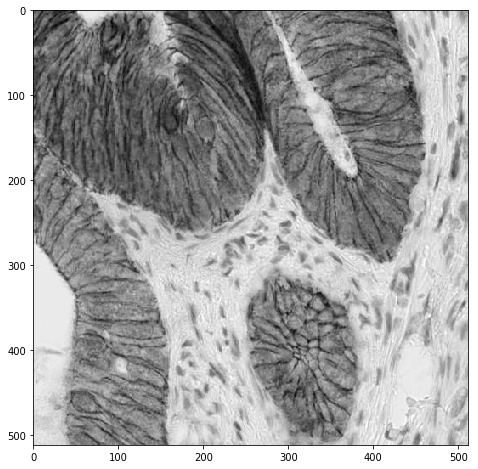

In [98]:
figsize(8,8)
imshow(im)

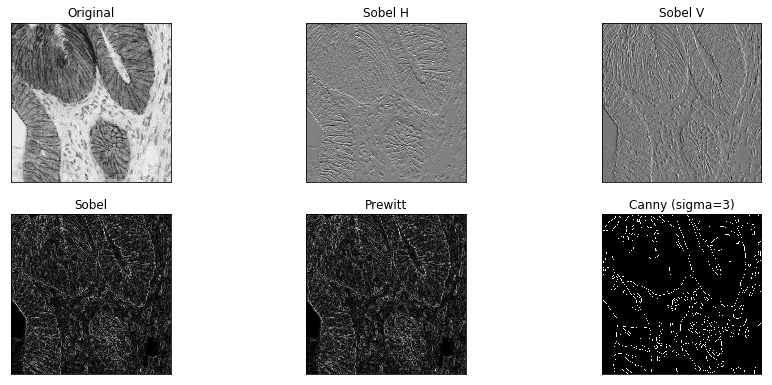

In [99]:
figsize(15, 10)

subplot(3,3,1)
title('Original')
imshow(im)
xticks([]);yticks([]);

subplot(3,3,2)
title('Sobel H')
imshow(filters.sobel_h(im));
xticks([]);yticks([]);

subplot(3,3,3)
title('Sobel V')
imshow(filters.sobel_v(im));
xticks([]);yticks([]);

subplot(3,3,4)
title('Sobel')
imshow(filters.sobel(im));
xticks([]);yticks([]);

subplot(3,3,5)
title('Prewitt')
imshow(filters.prewitt(im));
xticks([]);yticks([]);

subplot(3,3,6)
title('Canny (sigma=3)')
imshow(feature.canny(im, sigma=3));
xticks([]);yticks([]);


#colorbar()

# 3.   Do sobel_h filter on an image of your choosing, where you manually specify the filter weights and use convolution. 


In [101]:
import scipy
??scipy.ndimage.convolve

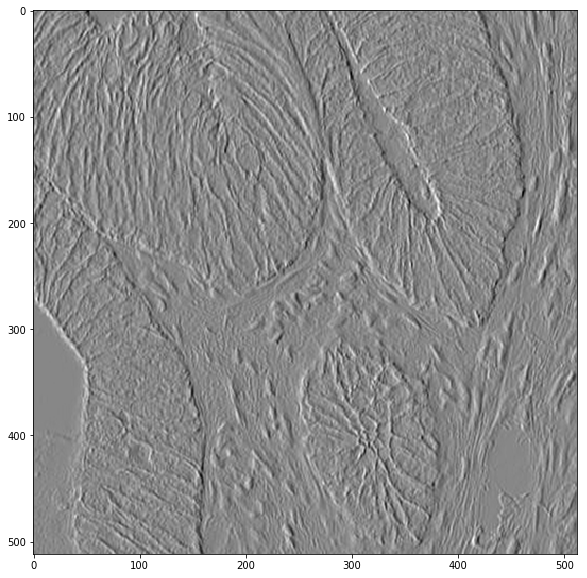

In [102]:
part2 = scipy.ndimage.convolve(im, np.matrix(([-1, 0, 1], [-2, 0, 2], [-1, 0, 1])))
imshow(part2)

# 4.   Show the  2D FFT of (3)

In [107]:
part3 = filters.sobel_h(im)
np.shape(im)

(512, 512)

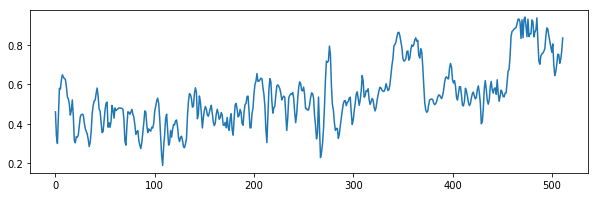

In [108]:
figsize(10,3)
plot(im[150])

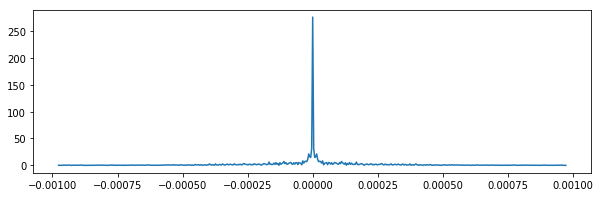

In [109]:
plot(
     np.fft.fftshift(np.fft.fftfreq(512,512)),
    np.fft.fftshift( np.abs(np.fft.fft(im[150]))));

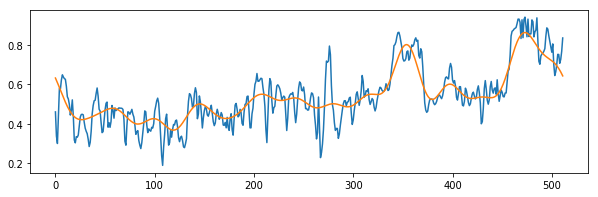

In [111]:
F = np.fft.fft(im[150])
x = arange(0, 512)
plot(im[150])
plot(  F[0 ].real/512 + F[0].imag/512
     + F[1 ].real*cos(-2*pi*x*1/512)/300  + F[1 ].imag*sin(-2*pi*x*1/512)/300
     + F[2 ].real*cos(-2*pi*x*2/512)/300  + F[2 ].imag*sin(-2*pi*x*2/512)/300
     + F[3 ].real*cos(-2*pi*x*3/512)/300  + F[3 ].imag*sin(-2*pi*x*3/512)/300
     + F[4 ].real*cos(-2*pi*x*4/512)/300  + F[4 ].imag*sin(-2*pi*x*4/512)/300
     + F[5 ].real*cos(-2*pi*x*5/512)/300  + F[5 ].imag*sin(-2*pi*x*5/512)/300
     + F[6 ].real*cos(-2*pi*x*6/512)/300  + F[6 ].imag*sin(-2*pi*x*6/512)/300
     + F[7 ].real*cos(-2*pi*x*7/512)/300  + F[7 ].imag*sin(-2*pi*x*7/512)/300
     + F[8 ].real*cos(-2*pi*x*8/512)/300  + F[8 ].imag*sin(-2*pi*x*8/512)/300
     + F[9 ].real*cos(-2*pi*x*9/512)/300  + F[9 ].imag*sin(-2*pi*x*9/512)/300
     + F[10].real*cos(-2*pi*x*10/512)/300 + F[10].imag*sin(-2*pi*x*10/512)/300
     + F[11].real*cos(-2*pi*x*11/512)/300 + F[11].imag*sin(-2*pi*x*11/512)/300
     + F[12].real*cos(-2*pi*x*12/512)/300 + F[12].imag*sin(-2*pi*x*12/512)/300
     + F[13].real*cos(-2*pi*x*13/512)/300 + F[13].imag*sin(-2*pi*x*13/512)/300
     + F[14].real*cos(-2*pi*x*14/512)/300 + F[14].imag*sin(-2*pi*x*14/512)/300
    )

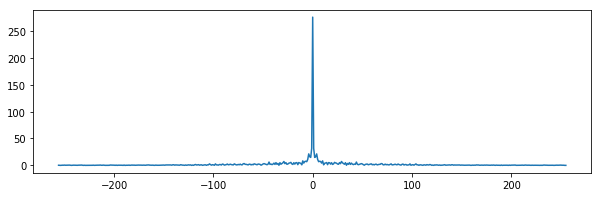

In [112]:
plot(arange(-im.shape[1]/2, im.shape[1]/2),   np.fft.fftshift(np.abs(np.fft.fft(im[150]))));

(0, 50)

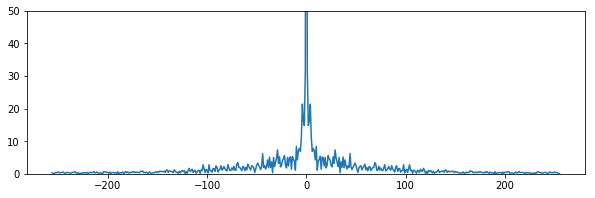

In [113]:
plot(arange(-im.shape[1]/2, im.shape[1]/2),  
     np.fft.fftshift(np.abs(np.fft.fft(im[150]))));
ylim(0, 50)

(-10, 50)

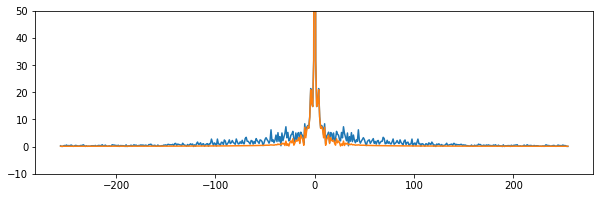

In [114]:
plot(arange(-im.shape[1]/2, im.shape[1]/2),   np.fft.fftshift(np.abs(np.fft.fft(im[150]))));
plot(arange(-im.shape[1]/2, im.shape[1]/2),   
     np.fft.fftshift(np.abs(np.fft.fft( 
         scipy.ndimage.gaussian_filter1d(im[150], sigma=5) ))));
ylim(-10, 50)

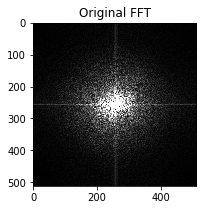

In [115]:
subplot(121)
title('Original FFT')
imshow(np.fft.fftshift(np.abs(np.fft.fft2(im))),vmin=0, vmax=200);

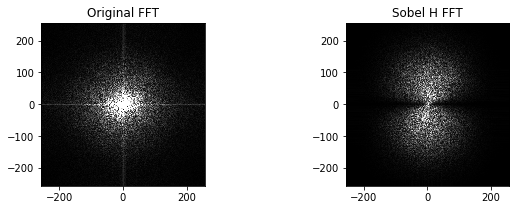

In [116]:
subplot(121)
title('Original FFT')
imshow(np.fft.fftshift(np.abs(np.fft.fft2(im))), vmin=0, vmax=200, 
       extent=(-im.shape[1]/2, im.shape[1]/2, -im.shape[0]/2, im.shape[0]/2)
      );
subplot(122)
title('Sobel H FFT')
imshow(np.fft.fftshift(np.abs(np.fft.fft2(part3))), vmin=0,vmax=200, 
       extent=(-im.shape[1]/2, im.shape[1]/2, -im.shape[0]/2, im.shape[0]/2));